In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
%matplotlib inline

In [2]:
df = pd.read_csv('~/Datasets/wine.csv')

In [3]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


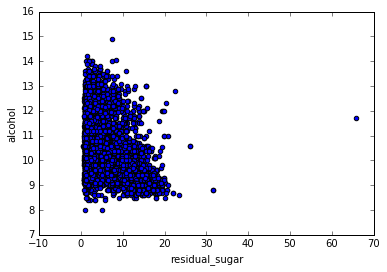

In [5]:
df.plot(kind='scatter', x='residual_sugar', y='alcohol')

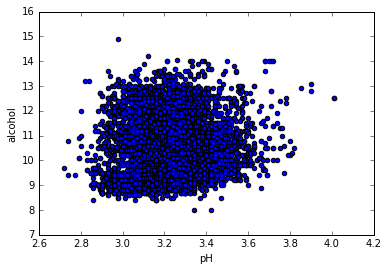

In [6]:
df.plot(kind='scatter', x='pH', y='alcohol')

In [7]:
df.shape

(6497, 15)

In [8]:
df.columns

Index([u'fixed_acidity', u'volatile_acidity', u'citric_acid',
       u'residual_sugar', u'chlorides', u'free_sulfur_dioxide',
       u'total_sulfur_dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality', u'color', u'is_red', u'high_quality'],
      dtype='object')

In [15]:
x = df[['fixed_acidity', u'volatile_acidity', u'citric_acid',
       u'residual_sugar', u'chlorides', u'free_sulfur_dioxide',
       u'total_sulfur_dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality', u'is_red']]
y = df['quality']

In [16]:
y.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
x_standard = StandardScaler().fit_transform(x)

In [19]:
k=8
kmeans = KMeans(n_clusters=k)
kmeans.fit(x_standard)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [20]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [21]:
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7}

In [22]:
predictions = kmeans.predict(x_standard)

In [23]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [24]:
df['quality'].head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [27]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [25]:
from sklearn.metrics import accuracy_score, silhouette_score

In [28]:
pd.Series(predictions).value_counts()

0    1220
5    1054
1     960
7     901
2     872
3     856
4     604
6      30
dtype: int64

In [29]:
## this is an erroneous comparision. predictions has nothing to do with y

accuracy_score(y, predictions)

0.092350315530244725

In [31]:
df = df.join(pd.DataFrame(predictions, columns=['clusters8']))

In [32]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality,clusters8
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0,4
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0,1


In [34]:
df.groupby('clusters8')['quality'].value_counts()

clusters8  quality
0          7          536
           6          529
           8          132
           5           18
           9            4
           4            1
1          5          502
           6          353
           4           49
           7           47
           3            7
           8            2
2          6          538
           7          222
           5           83
           8           25
           4            4
3          6          395
           5          319
           7          106
           8           17
           4           15
           3            3
           9            1
4          6          270
           5          165
           7          145
           8           14
           4            7
           3            3
5          5          565
           6          363
           4          114
           3            9
           7            3
6          5           20
           6            6
           4       

In [36]:
df.groupby('clusters8')['alcohol'].mean()

clusters8
0    12.126639
1    10.227274
2    10.617718
3     9.327784
4    10.716832
5    10.249032
6     9.403333
7     9.713393
Name: alcohol, dtype: float64

In [37]:
df.groupby('clusters8')['quality'].mean()

clusters8
0    6.649180
1    5.406250
2    6.207569
3    5.748832
4    5.975166
5    5.224858
6    5.133333
7    5.433962
Name: quality, dtype: float64

In [38]:
df.groupby('clusters8')['pH'].mean()

clusters8
0    3.176139
1    3.375177
2    3.357053
3    3.115514
4    3.221970
5    3.125769
6    3.065000
7    3.183940
Name: pH, dtype: float64

In [45]:
import seaborn as sns

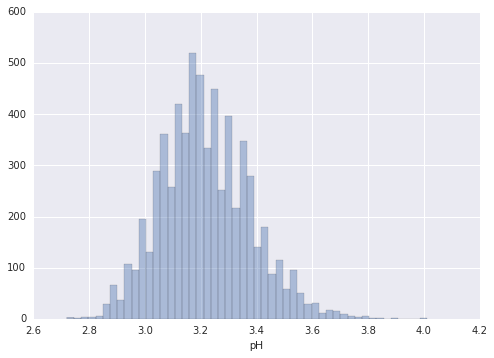

In [46]:
sns.distplot(df['pH'], kde=False)

In [48]:
df.groupby('clusters8')['residual_sugar'].mean()

clusters8
0     3.688279
1     2.423490
2     3.714794
3    14.445502
4     2.691556
5     3.564469
6     3.106667
7     8.277414
Name: residual_sugar, dtype: float64

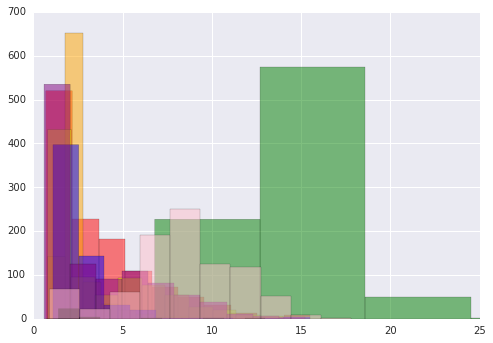

In [54]:
my_colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'black', 'pink']

for x in zip(range(0,8), my_colors):
    plt.hist(df.loc[(df['clusters8'] == x[0]), 'residual_sugar'], color=x[1], alpha=0.5)
    plt.xlim((0, 25))

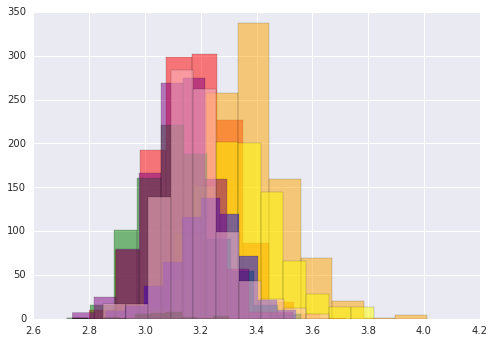

In [55]:
my_colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'black', 'pink']

for x in zip(range(0,8), my_colors):
    plt.hist(df.loc[(df['clusters8'] == x[0]), 'pH'], color=x[1], alpha=0.5)
#     plt.xlim((0, 25))

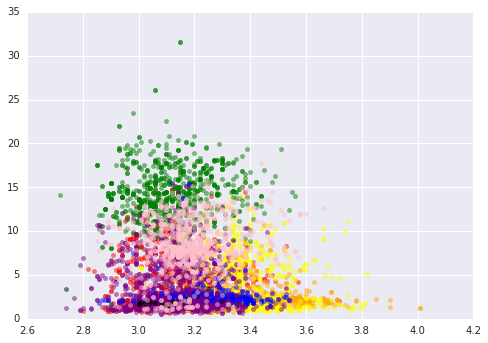

In [64]:
my_colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'black', 'pink']

for x in zip(range(0,8), my_colors):
    plt.scatter(df.loc[(df['clusters8'] == x[0]), 'pH'], 
                df.loc[(df['clusters8'] == x[0]), 'residual_sugar'],             
    color=x[1], alpha=0.5)
    plt.ylim((0,35))


In [65]:
df.columns

Index([u'fixed_acidity', u'volatile_acidity', u'citric_acid',
       u'residual_sugar', u'chlorides', u'free_sulfur_dioxide',
       u'total_sulfur_dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality', u'color', u'is_red', u'high_quality', u'clusters8'],
      dtype='object')

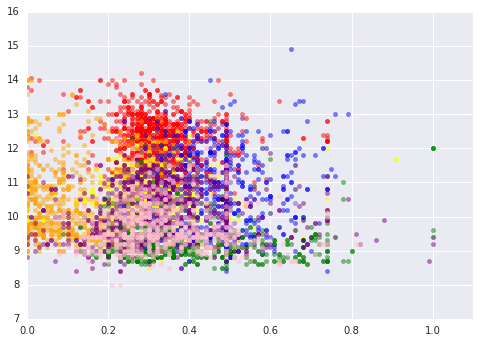

In [67]:
my_colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'black', 'pink']

for x in zip(range(0,8), my_colors):
    plt.scatter(df.loc[(df['clusters8'] == x[0]), 'citric_acid'], 
                df.loc[(df['clusters8'] == x[0]), 'alcohol'],             
    color=x[1], alpha=0.5)
#     plt.ylim((7.5,15))
    plt.xlim((0,1.1))

In [68]:
df.loc[(df['clusters8'] == 6)]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality,clusters8
17,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5,red,1.0,0.0,6
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6,red,1.0,0.0,6
42,7.5,0.490,0.20,2.6,0.332,8.0,14.0,0.99680,3.21,0.90,10.5,6,red,1.0,0.0,6
81,7.8,0.430,0.70,1.9,0.464,22.0,67.0,0.99740,3.13,1.28,9.4,5,red,1.0,0.0,6
83,7.3,0.670,0.26,1.8,0.401,16.0,51.0,0.99690,3.16,1.14,9.4,5,red,1.0,0.0,6
106,7.8,0.410,0.68,1.7,0.467,18.0,69.0,0.99730,3.08,1.31,9.3,5,red,1.0,0.0,6
147,7.6,0.490,0.26,1.6,0.236,10.0,88.0,0.99680,3.11,0.80,9.3,5,red,1.0,0.0,6
151,9.2,0.520,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4,red,1.0,0.0,6
169,7.5,0.705,0.24,1.8,0.360,15.0,63.0,0.99640,3.00,1.59,9.5,5,red,1.0,0.0,6
181,8.9,0.610,0.49,2.0,0.270,23.0,110.0,0.99720,3.12,1.02,9.3,5,red,1.0,0.0,6


In [69]:
df.loc[(df['clusters8'] == 6)].describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red,high_quality,clusters8
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,8.206667,0.523500,0.496667,3.106667,0.376000,18.433333,77.700000,0.997056,3.065000,1.082333,9.403333,5.133333,0.833333,0.033333,6.0
std,0.916866,0.150655,0.192879,3.149267,0.089222,13.561312,59.228459,0.001139,0.118576,0.333856,0.365290,0.730297,0.379049,0.182574,0.0
min,6.200000,0.200000,0.200000,1.400000,0.236000,5.000000,10.000000,0.993560,2.740000,0.480000,9.000000,3.000000,0.000000,0.000000,6.0
25%,7.700000,0.415000,0.317500,1.700000,0.333250,12.000000,45.000000,0.996430,3.002500,0.825000,9.200000,5.000000,1.000000,0.000000,6.0
50%,8.050000,0.505000,0.505000,1.800000,0.368500,16.000000,62.500000,0.996900,3.060000,1.095000,9.300000,5.000000,1.000000,0.000000,6.0
75%,8.700000,0.635000,0.675000,2.225000,0.414750,22.000000,78.000000,0.997775,3.117500,1.275000,9.475000,5.000000,1.000000,0.000000,6.0
max,11.000000,0.780000,1.000000,13.000000,0.611000,79.000000,227.000000,0.999600,3.300000,2.000000,10.500000,7.000000,1.000000,1.000000,6.0


In [70]:
from sklearn.metrics import silhouette_score

In [73]:
silhouette_score(x_standard, predictions)

0.1596411275453655

## ^^ this super low score suggests that we told it to make too many clusters

In [74]:
list_of_scores = []

for x in range(2, 25): 
    kmeans = KMeans(n_clusters=x)
    kmeans.fit(x_standard)
    predictions = kmeans.predict(x_standard)
    sil = silhouette_score(x_standard, predictions)
    list_of_scores.append((x, sil))

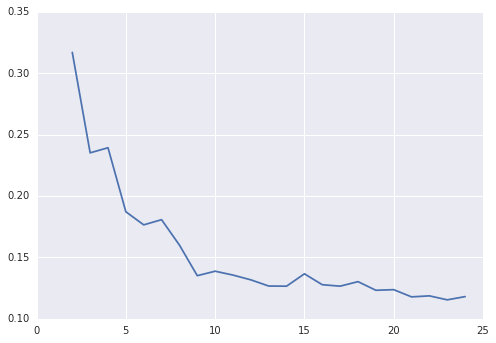

In [75]:
plt.plot([x[0] for x in list_of_scores],
         [x[1] for x in list_of_scores])

In [76]:
list_of_scores

[(2, 0.31699671601813872),
 (3, 0.23519496337948081),
 (4, 0.23933906187221138),
 (5, 0.18719962318492706),
 (6, 0.17651962656878784),
 (7, 0.18074982415747984),
 (8, 0.16005825747816413),
 (9, 0.13512799298014283),
 (10, 0.13877121046292307),
 (11, 0.13561135632667459),
 (12, 0.13173392069668047),
 (13, 0.12668737392899221),
 (14, 0.12657153456284473),
 (15, 0.13664864480404793),
 (16, 0.12776363719219067),
 (17, 0.12658717558163027),
 (18, 0.13026701753925862),
 (19, 0.1232459833897603),
 (20, 0.12373401345770392),
 (21, 0.117862865230557),
 (22, 0.11868505319102972),
 (23, 0.11544686822510529),
 (24, 0.11807481164739676)]

In [79]:
df.shape

(6497, 16)

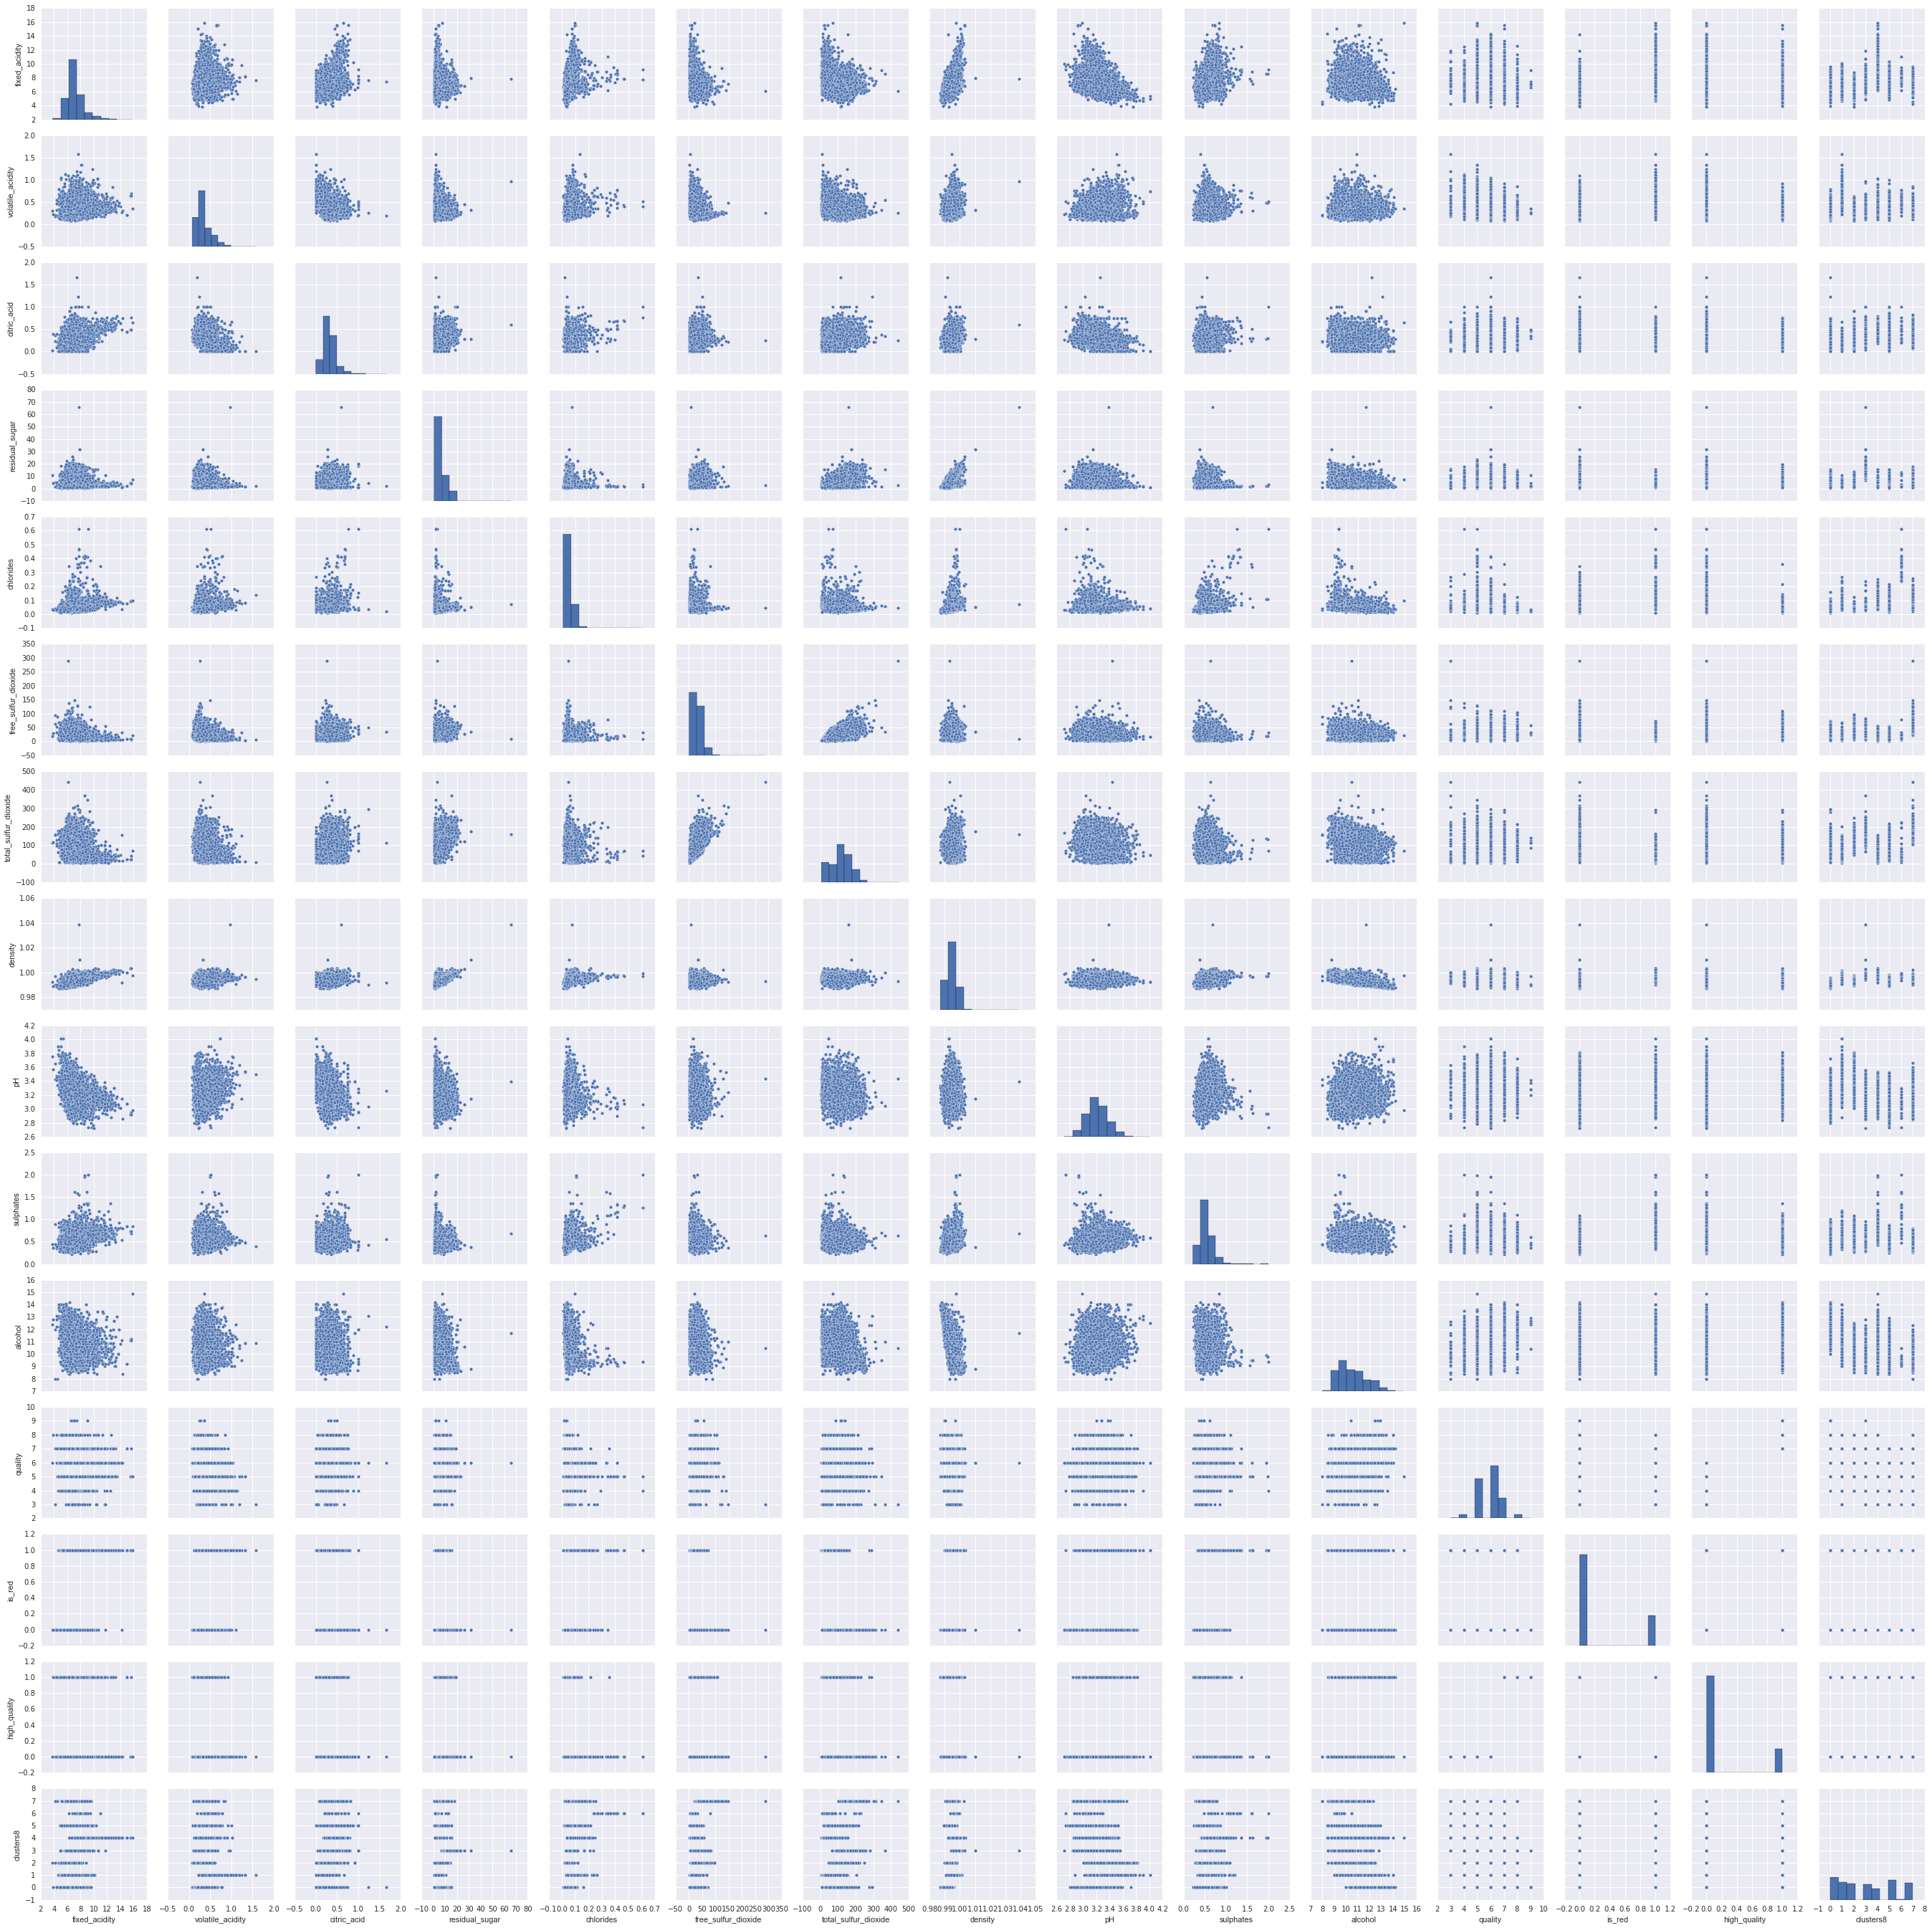

In [80]:
sns.pairplot(df)

In [128]:
final_model = KMeans(n_clusters=3)
final_model.fit(x_standard)
set(final_model.labels_)

{0, 1, 2}

In [129]:
df['classes_final'] = pd.DataFrame(final_model.labels_)

In [130]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality,clusters8,classes_final
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0,1,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0,1,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0,1,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0,4,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0,1,1


In [131]:
df['classes_final'].value_counts()

2    2958
0    1954
1    1585
Name: classes_final, dtype: int64

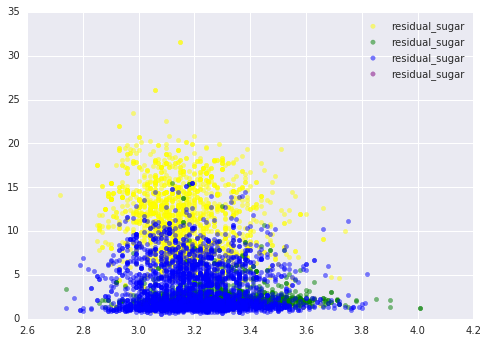

In [134]:
my_colors = ['yellow', 'green', 'blue', 'purple']

for x in zip(range(0,6), my_colors):
    plt.scatter(df.loc[(df['classes_final'] == x[0]), 'pH'], 
                df.loc[(df['classes_final'] == x[0]), 'residual_sugar'],             
    color=x[1], alpha=0.5)
    plt.ylim((0,35))
#     plt.xlim((0,1.1))
plt.legend()



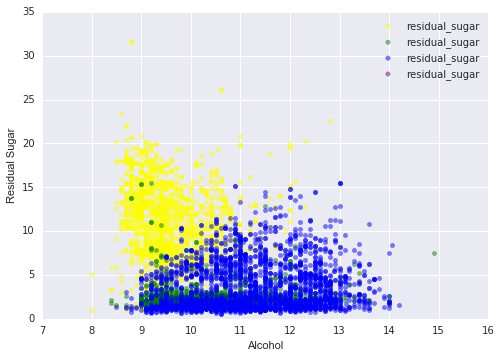

In [135]:
my_colors = ['yellow', 'green', 'blue', 'purple']

for x in zip(range(0,6), my_colors):
    plt.scatter(df.loc[(df['classes_final'] == x[0]), 'alcohol'], 
                df.loc[(df['classes_final'] == x[0]), 'residual_sugar'],             
    color=x[1], alpha=0.5)
    plt.ylim((0,35))
#     plt.xlim((0,1.1))
plt.legend()
plt.xlabel("Alcohol")
plt.ylabel("Residual Sugar")


In [136]:
def graph_pairwise(x_col, y_col):
    my_colors = ['yellow', 'green', 'blue', 'purple']
    for x in zip(range(0,6), my_colors):
        plt.scatter(df.loc[(df['classes_final'] == x[0]), x_col], 
                    df.loc[(df['classes_final'] == x[0]), y_col],             
        color=x[1], alpha=0.5)
#         plt.ylim((0,35))
    #     plt.xlim((0,1.1))
#         plt.legend("Group: " % x)
    plt.title("Plotting %s by %s" % (x_col, y_col)) 
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    



In [137]:
df.columns

Index([u'fixed_acidity', u'volatile_acidity', u'citric_acid',
       u'residual_sugar', u'chlorides', u'free_sulfur_dioxide',
       u'total_sulfur_dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality', u'color', u'is_red', u'high_quality', u'clusters8',
       u'classes_final'],
      dtype='object')

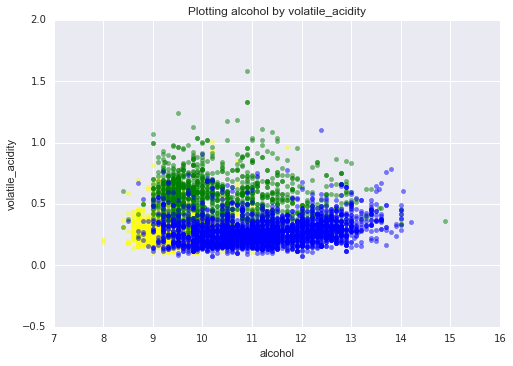

In [138]:
graph_pairwise('alcohol', 'volatile_acidity')